# Exploratory Data Analysis Exercise
* For this part we will be using the `data/cars.csv` dataset

In [138]:
# Import the libraries you'll need here.
import pandas as pd
import numpy as np


# A basic visualization library
import matplotlib.pyplot as plt

# A great visualization library
import seaborn as sns
# This command tells python to use seaborn for its styling.
sns.set()

# Very important, this will make your charts appear in your notebook instead of in a new window.
%matplotlib inline

# Provides z-score helper function
import scipy.stats as stats

# Ignore this, this is just for displaying images.
from IPython.display import Image

# Load the csv file into a pandas dataframe.


In [139]:
# Load the csv file into a pandas dataframe.
df = pd.read_csv('data/cars.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


# Data clean up part 1.

1. Print the number of duplicate rows we have in our dataframe.

2. Modify our df to have all duplicate rows removed. 

3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.

In [46]:
# 1. Print the number of duplicate rows we have in our dataframe.

print(df.duplicated().sum())
df.duplicated()


720


0        False
1        False
2        False
3        False
4        False
         ...  
11909    False
11910    False
11911    False
11912    False
11913    False
Length: 11914, dtype: bool

In [47]:
#  2. Modify our df to have all duplicate rows removed. 
df = df.drop_duplicates()
#to check for duplicates again
print (df.duplicated().sum())
~(df.duplicated())



0


0        True
1        True
2        True
3        True
4        True
         ... 
11909    True
11910    True
11911    True
11912    True
11913    True
Length: 11194, dtype: bool

In [48]:
# 3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.
print (df.duplicated().sum())


0


# Data clean up part 2.
* Which column has the most null values and how many null values does it have?
* Print how long our dataframe is.
* Remove any row that has a null value in it. 
* Do a sanity check and pring how long our dataframe is now that we have removed our null values.

In [49]:
# * Which column has the most null values and how many null values does it have?

df.isnull().sum()



Make                  0
Model                 0
Year                  0
Engine Fuel Type      3
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
Number of Doors       6
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64

In [50]:
# * Print how long (aka how many rows) our dataframe is.

print(df.shape[0])

11194


In [51]:
# * Remove any row that has a null value in it. 
df = df.dropna()

# Sanity Check
print(df.shape)

# pring how many null values there are
df.isnull().sum()

(11092, 15)


Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [52]:
# * Do a sanity check and pring how long our dataframe is now that we have removed our null values.
print(df.shape[0])



11092


### Make a bar chart that displays how many time each brand of car appears in this data. 
_Brand of car is the `Make` of the car._

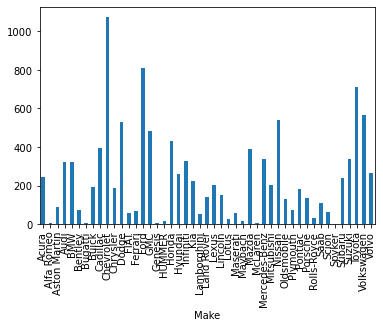

In [53]:
# Make a bar chart that displays how many times each brand of car appears in this data. 
bar = df.groupby('Make')['Make'].count()
#groupby() <--- inside is the title of the graph
# Make a bar plot of said means
bar.plot(kind='bar');

# Make the cart more legible, by making it a horizontal bar chart and changing the figure size.

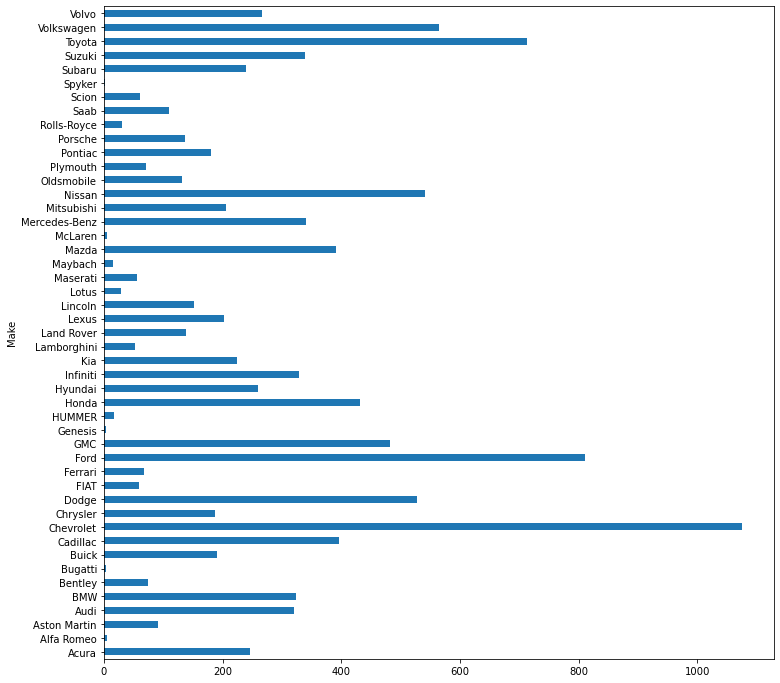

In [54]:
# Make the cart more legible, by making it a horizontal bar chart and changing the figure size.

bar.plot( kind = 'barh', figsize = (12,12))


### Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.
* What's noticeable about it and what do you think the error is...


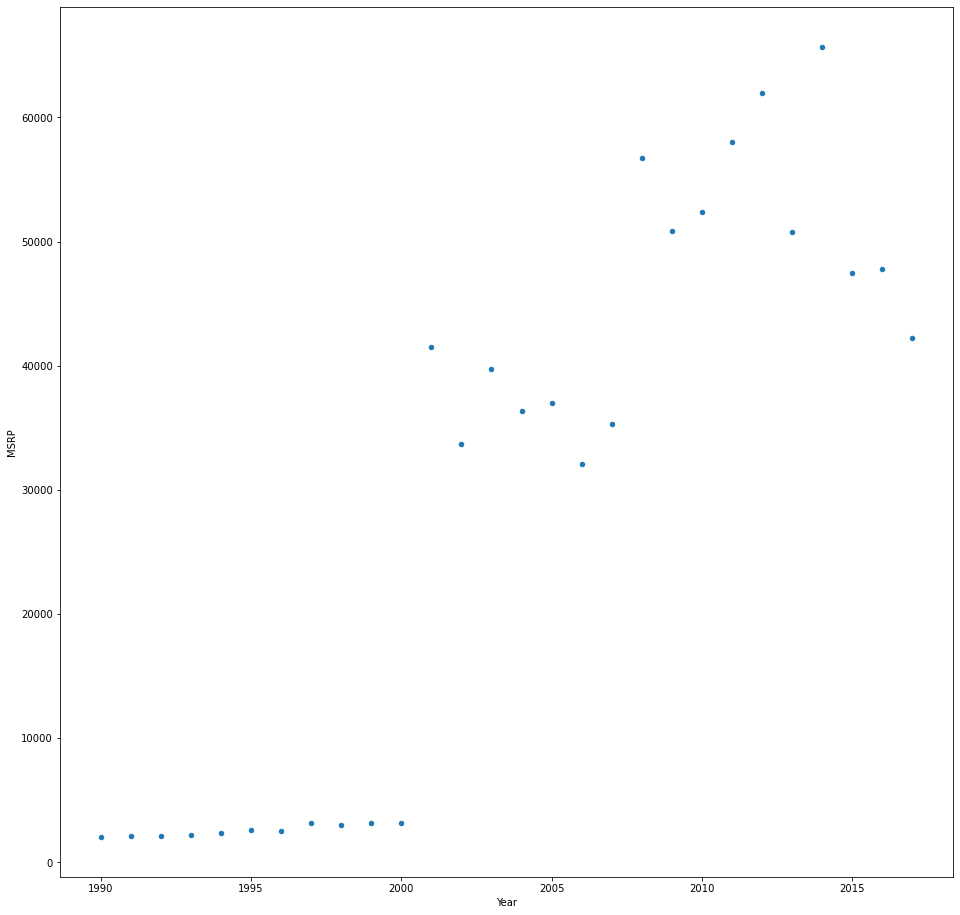

In [55]:
# Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.

# grouping by year and calculating average MSRP for each year
con = df.groupby('Year')['MSRP'].mean()
# converting the variable to a dataframe
new_df = pd.DataFrame(con)
new_df = new_df.reset_index()

new_df.plot(kind = 'scatter', x = 'Year', y = 'MSRP', figsize=(16, 16))

# It seems as though in the years before 2000, they were counting in tens.
Make a new column that is called `adjusted_price`, that contains all prices, however, for 
every year before 2000 make it 10x the original MSRP.

In [140]:
## Make a new column that is called `adjusted_price`, that contains all prices, however, for every year before 2000 make it 10x the original MSRP.
# df.head()
df['adjusted_price'] = df.MSRP

def function1(x, y):
    if (x < 2000):
        adj_price = y * 10
    else:
        adj_price = y
    return adj_price

# In the apply function, "lambda x" represents an anonymous function and the parameters in function1 have "x." attached
# indicating that they are of the same anonymous function (in this case, function1). axis = 1 is necessary because each row/tuple of data will
# undergo the same function and the Year and the price are needed from each record for the function to run
df['adjusted_price'] = df.apply(lambda x: function1(x.Year, x.adjusted_price), axis=1)
df.head()




,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,adjusted_price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500,34500


# Replot the new adjusted price.  
* Make the y-axis start at 0 and go up to 100,000

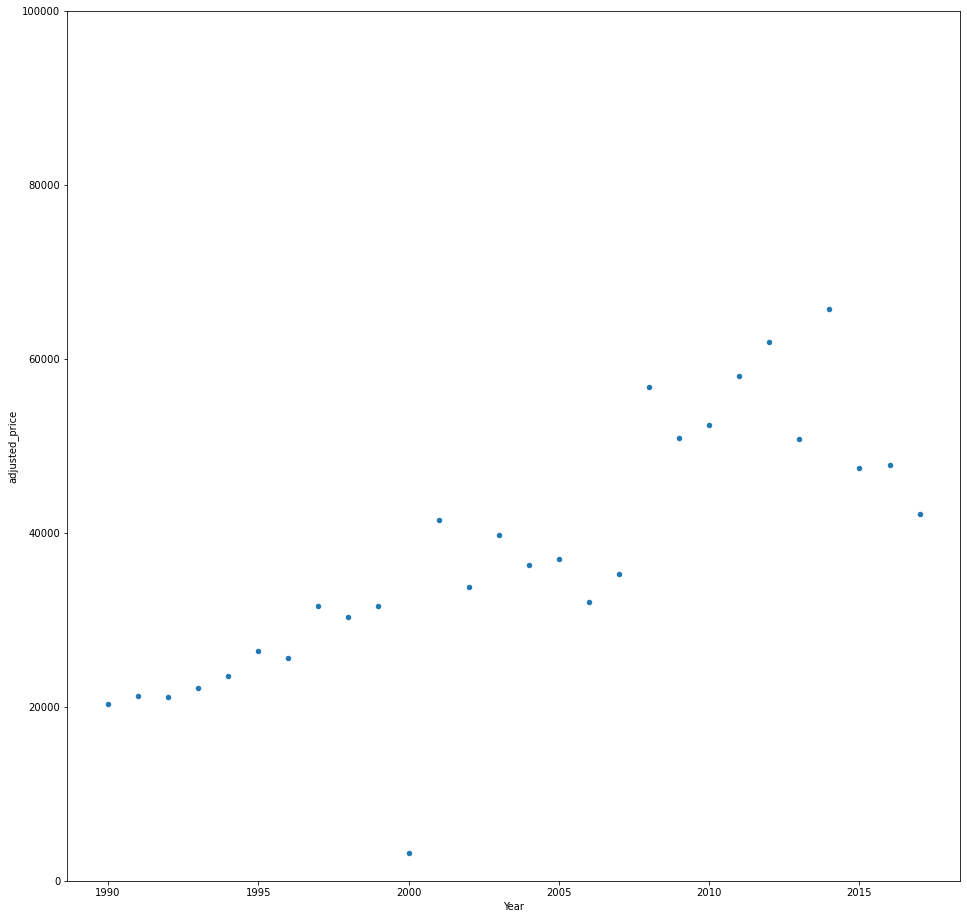

In [159]:
# Replot the new adjusted price and make the y-axis start at 0 and go up to 100,000

# grouping by year and calculating average MSRP for each year based on the new adjusted price
con = df.groupby('Year')['adjusted_price'].mean()
# converting the variable to a dataframe
new_df = pd.DataFrame(con)
new_df = new_df.reset_index()

new_df.plot(kind = 'scatter', x = 'Year', y = 'adjusted_price', ylim = (0, 100000), figsize=(16, 16))


# What are the top 5 car makers make the most expensive cars on average. 
* I only want the top 5, make sure your answer is the top 5 and only the top 5. 
* Use our `adjusted_price` column for this

In [165]:
# What are the top 5 car makers make the most expensive cars on average. 

# grouping by car maker and calculating average MSRP for each year based on the adjusted price
con = df.groupby('Make')['adjusted_price'].mean()
# converting the variable to a dataframe
new_df = pd.DataFrame(con)
new_df = new_df.reset_index()

# sorting our new df to have the companies with the most expensive cars, on average, at the top of the data
new_df = new_df.sort_values("adjusted_price", ascending = False)
top5 = [0, 1, 2, 3, 4]
new_df.iloc[top5]



,Make,adjusted_price
6,Bugatti,1.757224e+06
28,Maybach,5.462219e+05
38,Rolls-Royce,3.511306e+05
22,Lamborghini,3.315673e+05
5,Bentley,2.471693e+05


# What are the top 5 car makers that have the highest median highway MPG?

In [ ]:
# Which car makers have the highest median highway MPG?

# grouping by car maker and calculating average highway MPG for each maker
con = df.groupby('Make')['highway MPG'].mean()
# converting the variable to a dataframe
new_df = pd.DataFrame(con)
new_df = new_df.reset_index()

# sorting our new df to have the highest MPG car makers, on average, at the top of the data
new_df = new_df.sort_values("highway MPG", ascending = False)
top5 = [0, 1, 2, 3, 4]
new_df.iloc[top5]


# Using `sns.histplot`, make histogram of the adjusted_price of just these car makers.
* ['Chevrolet', 'Ford', 'Toyota']

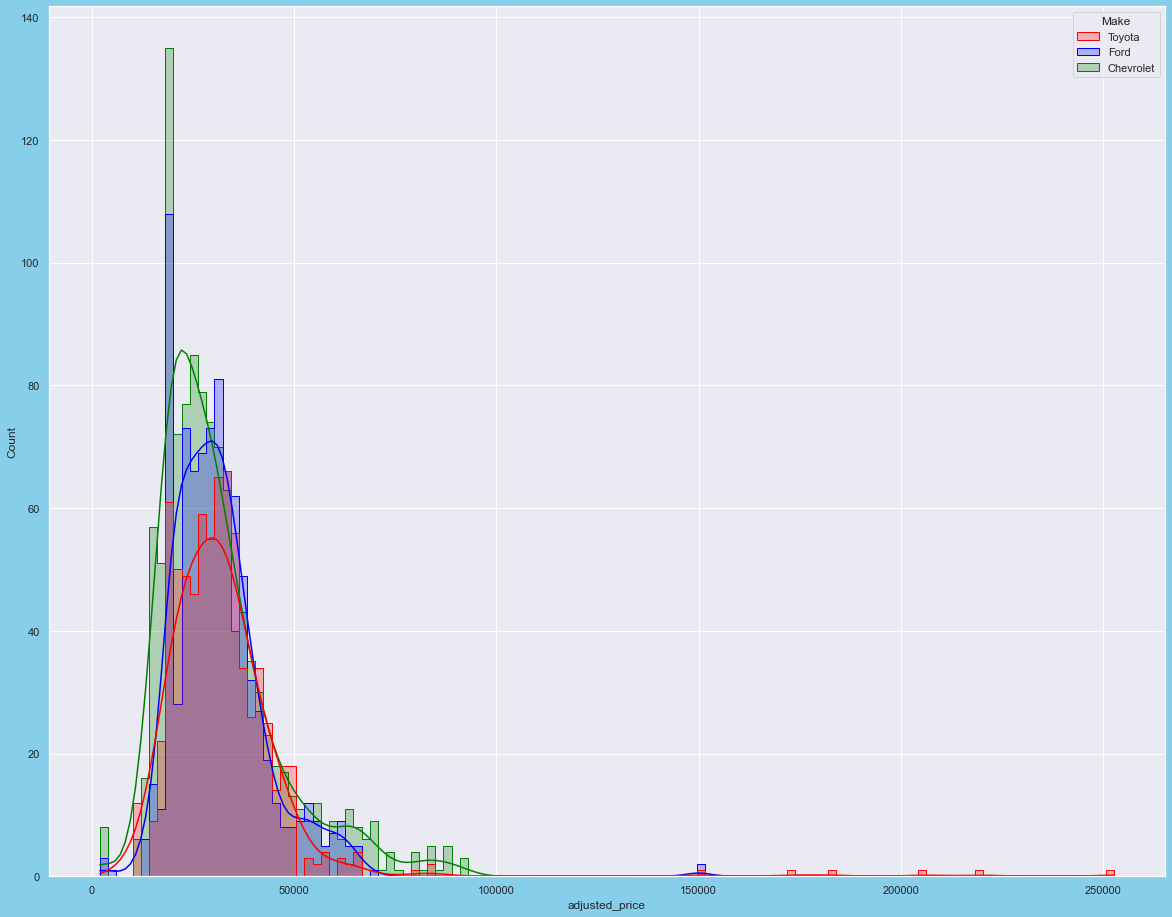

In [141]:
# Using `sns.histplot`, make histogram of the adjusted_price of just these car makers.

car_makers = ['Chevrolet', 'Ford', 'Toyota']
selected_makers = df.Make.isin(car_makers)

# grouping by these three specific car makers and
con = df[selected_makers]
# converting the variable to a dataframe
new_df = pd.DataFrame(con)
new_df = new_df.reset_index()

con2 = new_df.adjusted_price.count()

my_palette = ['Red', 'Blue', 'Green']
plt.figure(facecolor = 'Skyblue', figsize=(20,16))
histo = sns.histplot(data = new_df, x = 'adjusted_price', hue = 'Make', element = 'step', palette = my_palette, kde = True)

# Remake the same histogram, but limit the x-axis from 0 to 100,000

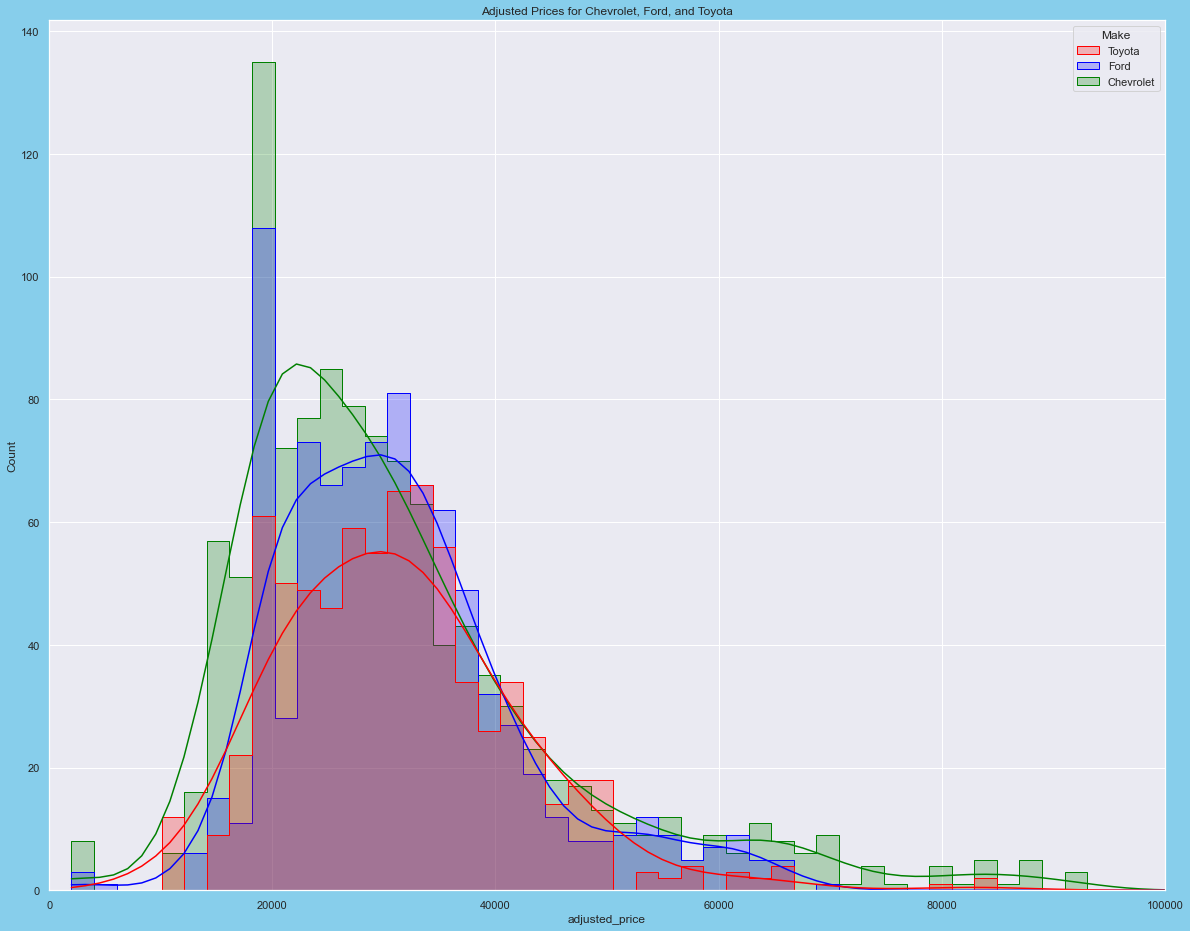

In [72]:
# Remake the same histogram, but limit the x-axis from 0 to 100,000

car_makers = ['Chevrolet', 'Ford', 'Toyota']
selected_makers = df.Make.isin(car_makers)

# grouping by these three specific car makers and
con = df[selected_makers]
# converting the variable to a dataframe
new_df = pd.DataFrame(con)
new_df = new_df.reset_index()

con2 = new_df.adjusted_price.count()

my_palette = ['Red', 'Blue', 'Green']
plt.figure(facecolor = 'Skyblue', figsize=(20,16))
histo = sns.histplot(data = new_df, x = 'adjusted_price', hue = 'Make', element = 'step', palette = my_palette, kde = True);
histo.set_title("Adjusted Prices for Chevrolet, Ford, and Toyota");
histo.set(xlim = (0, 100000));

# Plot the relationship between Engine HP and highway MPG

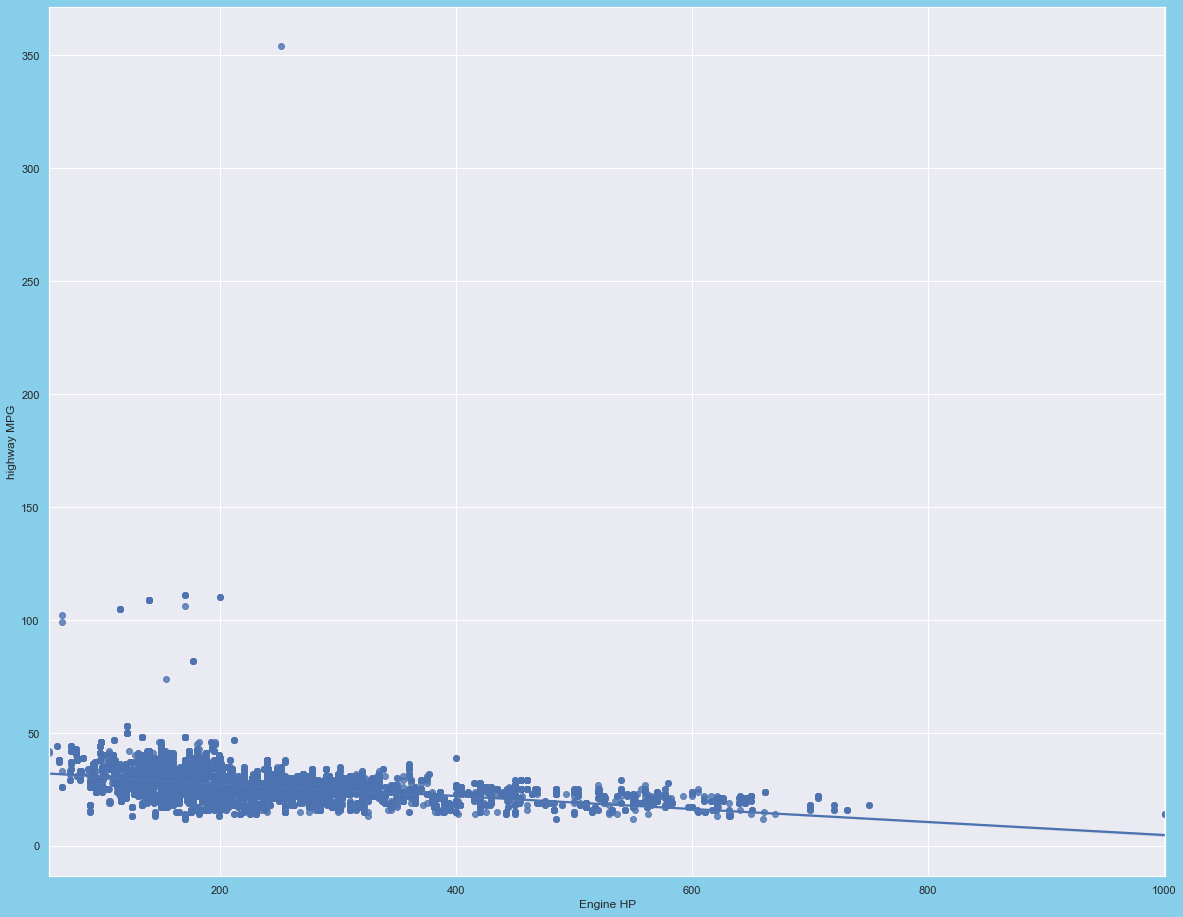

In [120]:
# Plot the relationship between Engine HP and highway MPG
plt.figure(facecolor = 'Skyblue', figsize=(20,16))
scatter = sns.regplot(data = df, x = 'Engine HP', y = 'highway MPG')


# Remove any statisical outliers from Engine HP and highway MPG and plot the result.
* Statisical outliers meaning values that are further than 3 standard deviations from the mean 
* Create a new columns for z-scores for each 'Engine HP' and 'highway MPG' named 'Engine HP_zscore' and 'highway MPG_zscore'
* Calculate the z-scores for each of our target columns.
* Make sure you set the z-scores to be their absolute values. 
* Create condition masks for when either of those absolute values are greater than 3.

* Create a new dataframe that is a copy of our dataframe using df.copy()

* Using our new dataframe
    * Filter out all Engine HP Z-Scores that are greater than 3
    * Filter out all Highway MPG z-scores that are greater than 3.
    * Make the same scatterplot plotting the relationship of Engine HP and Highway MPG as before but with the this dataframe.

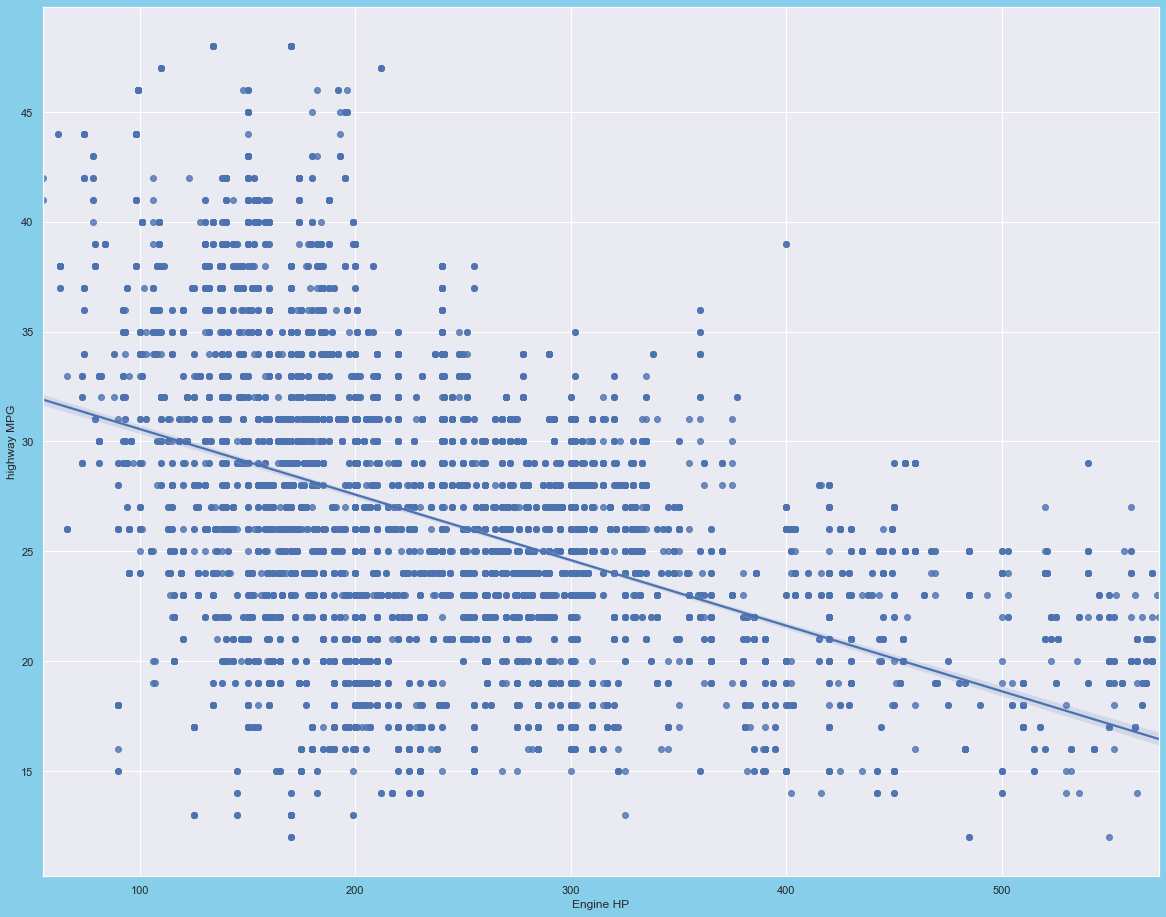

In [147]:
# Remove any statisical outliers from Engine HP and highway MPG

# Create a list of just our numerical columns
cols = ['Engine HP', 'highway MPG']
df = df.dropna(subset = cols)
df.isnull().sum()

# # Create an empty list that we will store our new z-score column names in
z_score_cols = []

# Loop through the numerical columns
for col in cols:
    
    # Create a new column name that is the old column name + 'z_score'
    new_col_name = col + '_zscore'
    
    # Call the zscore function on the numerical column in our dataframe
    # And set it equal to our new column name.
    df[new_col_name] = stats.stats.zscore(df[col])
    
    # Convert all values into absolute values. 
    df[new_col_name] = abs(df[new_col_name])
    
    # Append the new column name our our z_score_cols list for easier access for later.
    z_score_cols.append(new_col_name)
    
# Copying df to a new DataFrame
new_df = df.copy()

# Filters out the zscores that are over the value limit of 3
engFilter = new_df['Engine HP_zscore'] < 3
highFilter = new_df['highway MPG_zscore'] < 3
new_df = new_df[engFilter & highFilter]

plt.figure(facecolor = 'Skyblue', figsize=(20,16))
scatter = sns.regplot(data = new_df, x = 'Engine HP', y = 'highway MPG')


# What does this plot tell you about how Engine HP affects highway MPG?

In [148]:
# What does this plot tell you about how Engine HP affects highway MPG?
print('This plot indicates a weak negative correlation between Engine HP and highway MPG, as the plot makes it clear there is a negative, steep slope.')

This plot indicates a weak negative correlation between Engine HP and highway MPG, as the plot makes it clear there is a negative, steep slope.


# Using a pairplot, display all of the linear relationship.
* Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP,adjusted_price,Engine HP_zscore,highway MPG_zscore
Year,1.000000,0.351794,-0.034368,0.263018,0.274998,0.221280,0.073840,0.227376,0.130788,0.000052,0.029788
Engine HP,0.351794,1.000000,0.779988,-0.102713,-0.406563,-0.439371,0.037501,0.662008,0.640319,0.506151,-0.085836
Engine Cylinders,-0.034368,0.779988,1.000000,-0.137584,-0.620346,-0.637872,0.045234,0.544553,0.557160,0.408311,-0.020154
Number of Doors,0.263018,-0.102713,-0.137584,1.000000,0.120740,0.131988,-0.050439,-0.127254,-0.166904,-0.239350,0.008163
highway MPG,0.274998,-0.406563,-0.620346,0.120740,1.000000,0.855951,-0.030537,-0.192408,-0.220217,-0.075186,0.553470
city mpg,0.221280,-0.439371,-0.637872,0.131988,0.855951,1.000000,-0.013736,-0.208035,-0.230440,-0.064748,0.503035
Popularity,0.073840,0.037501,0.045234,-0.050439,-0.030537,-0.013736,1.000000,-0.047842,-0.046791,-0.031935,0.064842
MSRP,0.227376,0.662008,0.544553,-0.127254,-0.192408,-0.208035,-0.047842,1.000000,0.985423,0.571206,0.052097
adjusted_price,0.130788,0.640319,0.557160,-0.166904,-0.220217,-0.230440,-0.046791,0.985423,1.000000,0.578697,0.055608
Engine HP_zscore,0.000052,0.506151,0.408311,-0.239350,-0.075186,-0.064748,-0.031935,0.571206,0.578697,1.000000,0.123078


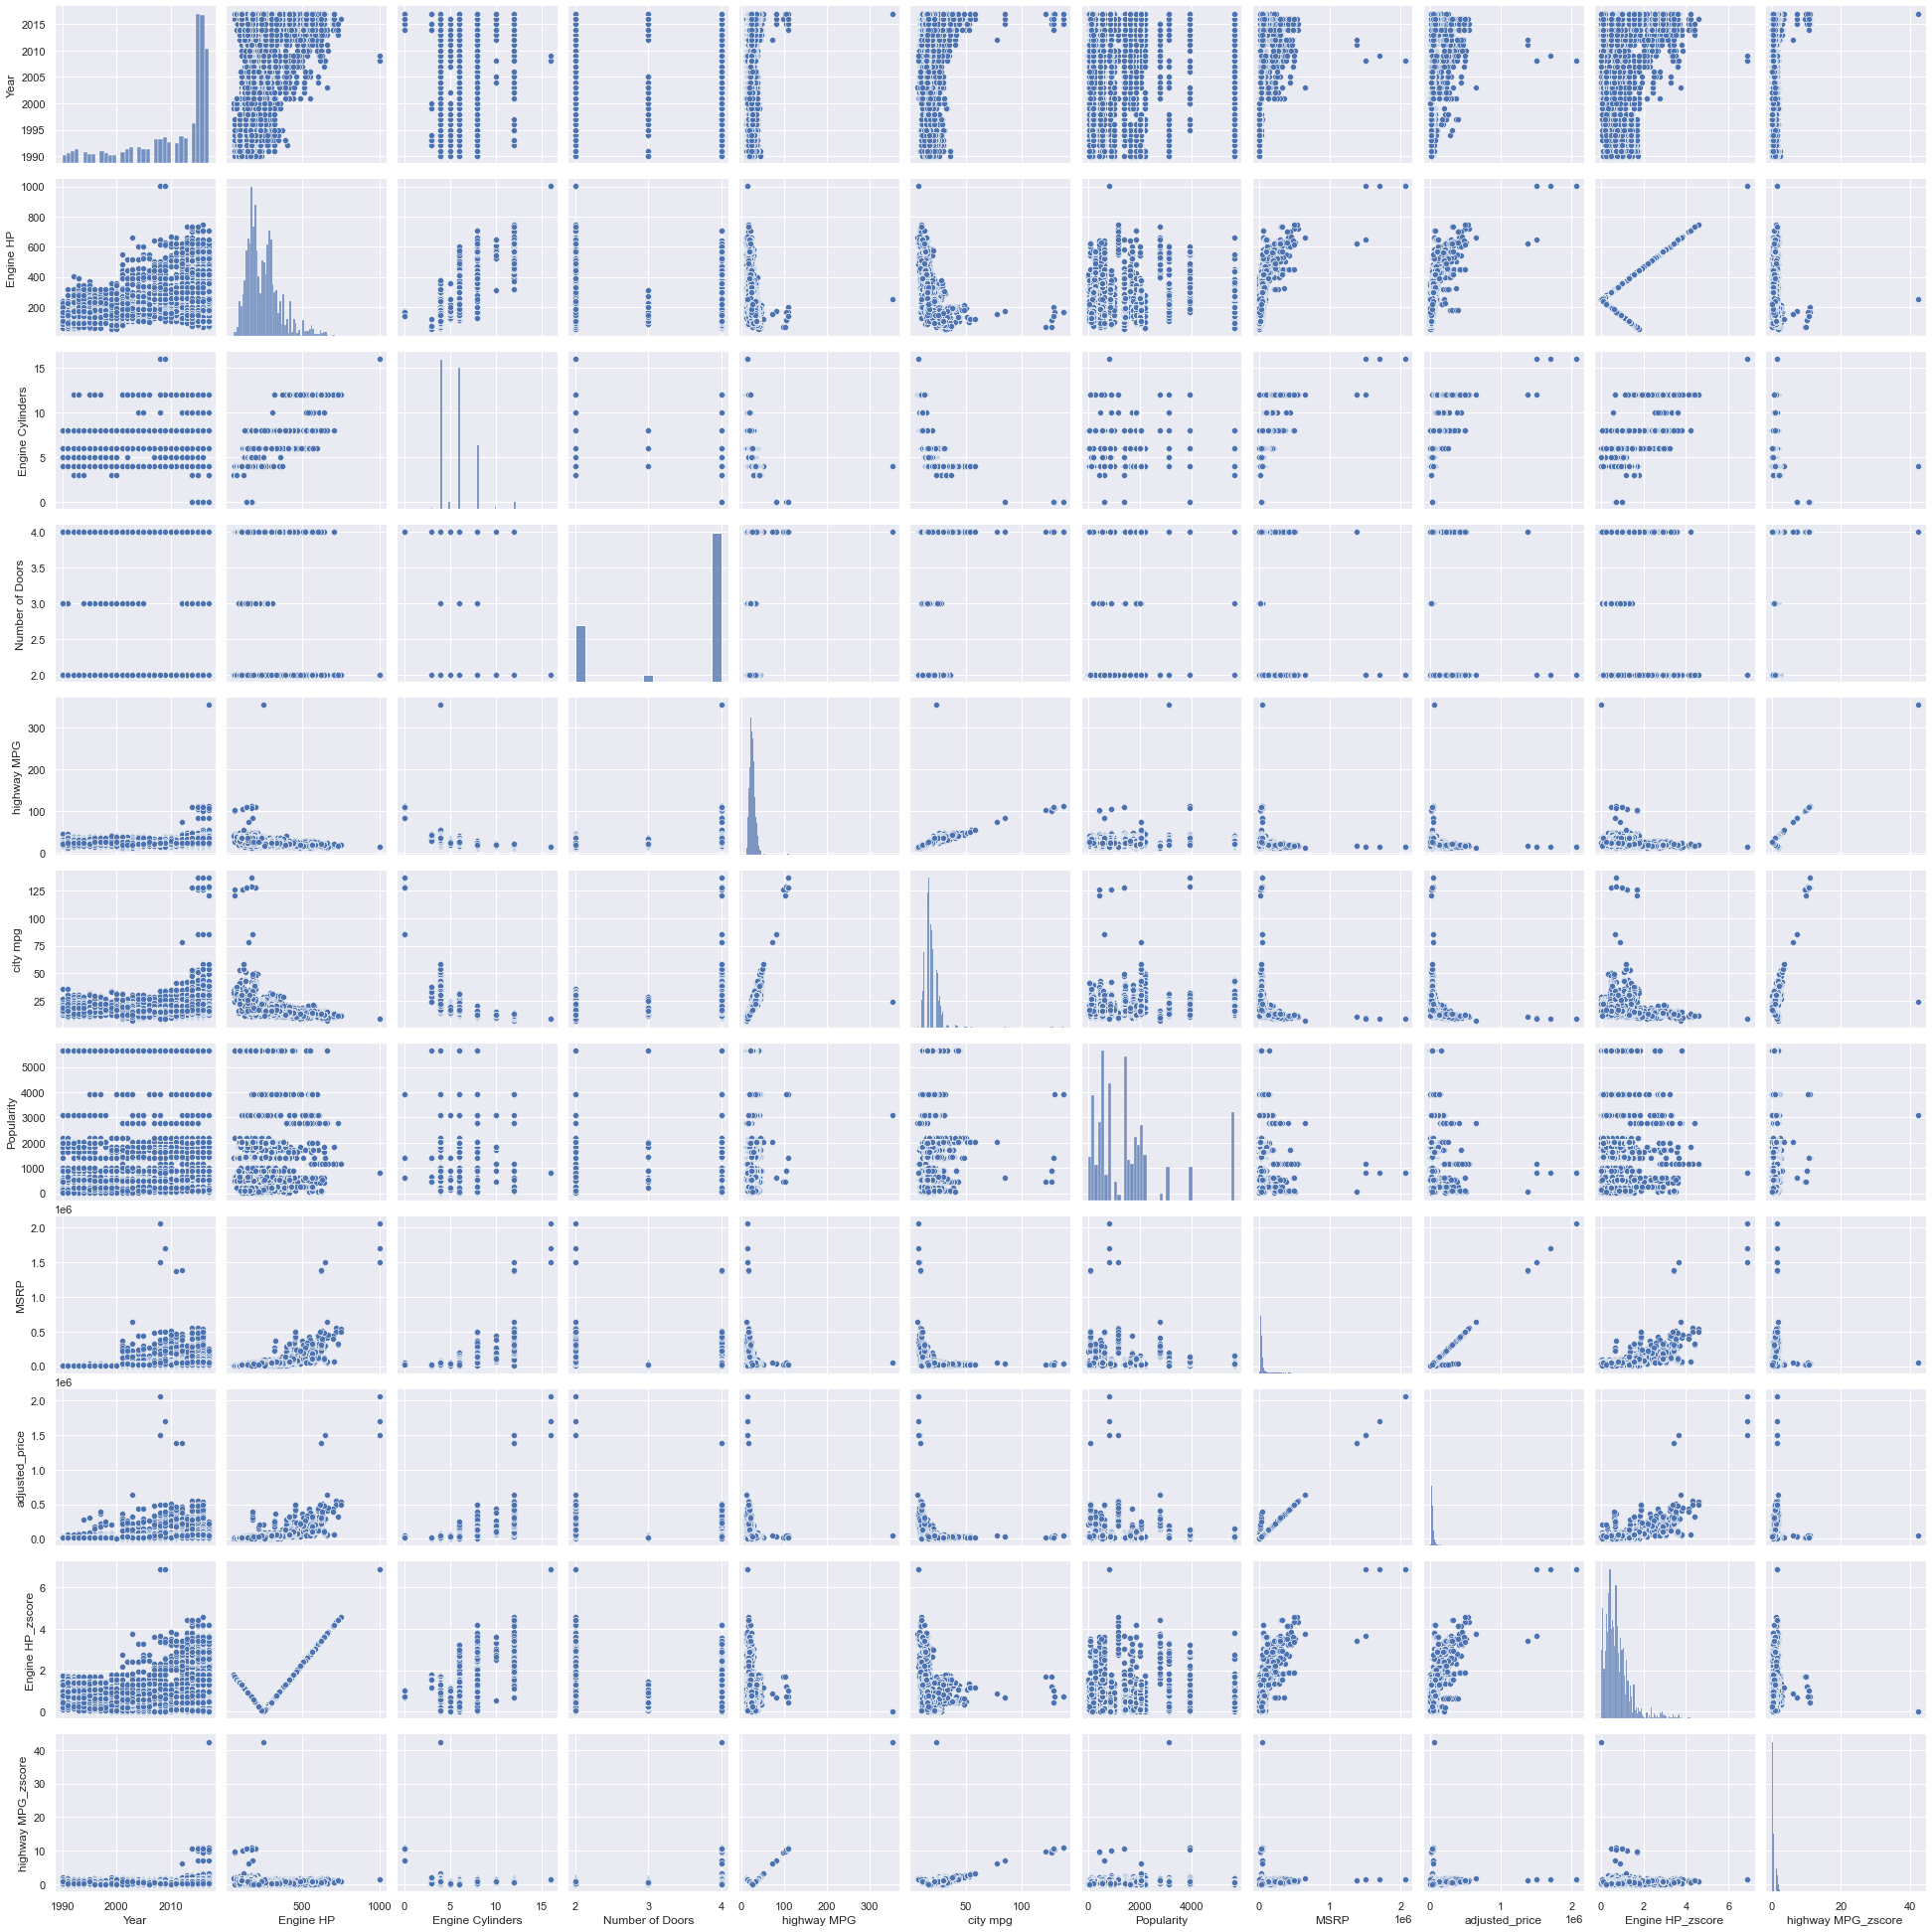

In [146]:
# Using a pairplot, display all of the linear relationship.
sns.pairplot(df)



In [28]:
# * Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).
print('The variables that appear to have the strongest linear relationship (besides MSRP and adjusted_price) are city MPG and highway MPG' +
     'with a strong positive correlation factor of about 0.85')



YOUR ANSWER HERE


# Find which features actually have the strongest linear relationship using correlations.
* Make a heatmap plot of all of the correlations in our dataset.
* Change the figure size of our heatmap plot to be 8x8
* Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.

Engine HP has a strong correlation with Engine cylinders because engine cylinders are a key component in a properly functioning engine. This results in a strong, positive correlation between the two because if the cylinder fails, most likely the engine itself will folloe suit.




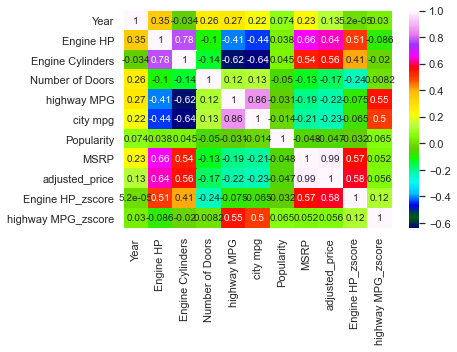

In [166]:
# * Make a heatmap plot of all of the correlations in our dataset.
# * Change the figure size of our heatmap plot to be 8x8
plt.plot(figsize = (8,8))
sns.heatmap(df.corr(), annot=True, cmap='gist_ncar')

print("Engine HP has a strong correlation with Engine cylinders because engine cylinders are a key component in a properly functioning engine. " +
     "This results in a strong, positive correlation between the two because if the cylinder fails, most likely the engine itself will folloe suit.\n\n")

# [EXTRA CREDIT] 
* In the column names, replace all the spaces with an underscore, and make them all lowercase as well
* Using subplots, display the histogram of adjusted_price for 'Ford' and 'Toyota' appear on charts side by side. 
    * `f, axes = plt.subplots(1, 2, figsize=(13,5))`



In [30]:
# * In the column names, replace all the spaces with an underscore, and make them all lowercase as well


